<a href="https://colab.research.google.com/github/KorhanErkan/CapstoneProject_KorhanErkan_AirBnB/blob/master/CapStone_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AirBnb HOUSE PRICE PREDICTION FOR NEW LISTINGS**         ///     **KORHAN ERKAN**

ABSTRACT

**AirBnb HOUSE PRICE PREDICTION FOR NEW LISTINGS**

Price estimation applications are widely used today. People generally list their products after a superficial market research for the sale or rental of the product they have. By using machine learning techniques, the most suitable price for the product can be determined from listings that have been sold or rented with similar conditions and features before. This project based on AirBnB application which is widely used in many countries and data based on Seattle-USA AirBnB listings. The purpose of the project was to estimate the rental value of a new listing's home in this state. In this project, particular attention was paid to removing the columns in the data set that the new listers do not have. In the estimation phase, the Random Forest Classifier algorithm is used.


Table Of Contents

1.   **AirBnb House Price Prediction Challenge**

2.   **Related Works**

3.   **Data Preparation** 

4.   **Model Development**

     4.1. Linear Regression
     4.2. Logistic Regression
     4.3. Ridge Regression
     4.4. Lasso Regression
     4.5. Decision Tree Classification
     4.6. Random Forest Classification
     4.7. K-Nearest Neighbours Algorithm


5.   **Model Validation**

6.   **Results and Discussion**

7.   **Conclusion and Future Works**

8.   **References**



**INTRODUCTION**

The purpose of this project is to estimate the price of the house for the person who will create a new AirBnB listing in Seattle, USA. In this estimation, the most appropriate price estimation is made by comparing it with other similar houses by taking advantage of the house type, interior features, location and amenities.The reason why I chose this project was that I often use the AirBnB application and in this way, I could have a better understanding of the data set. In addition, I believed that I could do a better job in the face of similar projects that I found as a result of my research on the internet. At the same time, inadequacies such as the lack of a mobile application of this study became one of the factors that increased my motivation. Thus, there were different areas where I could develop the project in the continuation of the project. I would also be able to apply many different information I learned in this course in this project and interpret the results. These reasons formed my main motivation for this project.

1.   **AirBnb House Price Prediction Challenge**

The AirBnB Seattle dataset consists of listings and a separate calendar dataset that shows at what date and at what price those listings were held. The calendar data set covers the last 4 months of 2022 and the 9 months of 2023.


If I need to talk about the general difficulties of the project, since the AirBnb market is a free market like other sales channels, no outlier determination can be made, especially in the price part, absence of a few important data information such as cleaning fee in the dataset. In addition, the high number of columns that the new listings do not have has increased the importance of feature engineering in model development.

2.   **Related Works**


Yu and Wu **[1]** made an attempt to use feature significance analysis, linear regression, SVR, and Random Forest regression to predict real estate prices. With the use of Naive Bayes, Logistic Regression, SVC, and Random Forest, they also made an effort to categorize the prices into 7 groups. They stated that their SVR model had a best RMSE of 0.53 and that their SVC model with PCA had a classification accuracy of 69%. In a different study, Ma et al **[2]**. examined warehouse rental rates in Beijing using linear regression, regression trees, random forest regression, and gradient boosting regression trees. They came to the conclusion that the tree regression model performed the best, with an RMSE of 1.05 CNY(Chinese Yuan)/m2-day


An Airbnb pricing prediction model was created by Yuanhang Luo, Xuanyu Zhou, and Yulian Zhou **[3]** utilizing Random Forest, XGBoost, and Neural Network. They kept features like country code and number of bedrooms to create the model while removing features like host id and customer name to reduce noise. Textual information is often referred to as textual features. Examples include house descriptions and neighborhood reviews. XGBoost and Neural Network outperform other models after rigorous feature engineering and extraction on the New York and Paris dataset. To analyze the outcome, R-Squared and Median Squared Error (MSE) are utilized. For XGBoost, the R-Squared error is 0.722, and for neural networks, it is 0.769. Other related efforts that used outside resources to add features were examined. Since longitude and zip code don't greatly effect prediction accuracy, they are typically removed from most research. However, QuangTrungNg **[4]** yen uses the location data to calculate the number of nearby tourist attractions in order to enhance the performance. All three of the aforementioned research used other elements in addition to the dataset's numerical data, including language, photos, and location.



3. **Data Preparation**

We select the dataset offered by Inside Airbnb [5], which includes broad details on listings and a calendar for several cities. We employ two split datasets in this experiment that contain Seattle booking data between September 2022 and September 2023. The first dataset, "listings.csv," lists the essential details of each listing, like the host address, the type of lodging, the number of bedrooms, etc. Some of the data, such the host name and listing URL, have little bearing on the accuracy of our predictions. To lessen the loudness, they are deleted throughout the cleaning period. The second file, "calendar.csv," includes availability, prices, and dates for each item.


For the better understanding of datasets we need more information. It starts with calling the necessary libraries for data set review and preliminary preparation.

For the detailed description of the columns please follow the URL link.

[Detailed Description of The Columns](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#Reading datasets
listings_df = pd.read_csv("listings.csv")
dataC = pd.read_csv("calendar.csv")
#Displaying all columns
pd.set_option('display.max_columns', None)

In [ ]:
#Checking shapes of dataframes
print("Listings DataFrame Shape:", listings_df.shape)
print("Calendar DataFrame Shape:", dataC.shape)

Listings DataFrame Shape: (5904, 75)
Calendar DataFrame Shape: (2146772, 7)


In [ ]:
listings_df.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,53939356,https://www.airbnb.com/rooms/53939356,20220918143902,2022-09-18,city scrape,FIR - Large Private room in Lake Forest with sink,Enjoy easy access to everything from this cent...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,435279521,https://www.airbnb.com/users/show/435279521,Nathan,2021-12-08,"Lake Forest Park, WA",NaN,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/42b0f...,https://a0.muscache.com/im/pictures/user/42b0f...,NaN,7,9,"['email', 'phone']",t,t,NaN,Cedar Park,Lake City,47.73908,-122.29009,Private room in home,Private room,1,NaN,2 shared baths,1.0,1.0,"[""Toaster"", ""Iron"", ""Long term stays allowed"",...",$42.00,1,365,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,29,59,89,364,2022-09-18,9,9,3,2022-06-04,2022-09-16,4.33,4.67,4.22,5.00,4.78,4.33,4.44,NaN,t,7,0,7,0,2.52
1,630392837253856994,https://www.airbnb.com/rooms/630392837253856994,20220918143902,2022-09-18,city scrape,"Water-view retreat with deck, grill, paddleboa...",<b>The space</b><br />Lake View Retreat<br /><...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,104834083,https://www.airbnb.com/users/show/104834083,Vacasa Washington,2016-11-22,NaN,Vacasa\nVacation Home Management\n\nVacasa unl...,within an hour,98%,99%,f,https://a0.muscache.com/im/pictures/user/09936...,https://a0.muscache.com/im/pictures/user/09936...,West Seattle,430,578,"['email', 'phone']",t,t,NaN,Rainier Beach,Rainier Valley,47.50846,-122.23577,Entire rental unit,Entire home/apt,5,NaN,1 bath,2.0,4.0,"[""Gym"", ""Children\u2019s dinnerware"", ""Stove"",...",$194.00,3,365,3.0,5.0,29.0,365.0,3.1,31.3,NaN,t,25,55,85,360,2022-09-18,2,2,1,2022-08-10,2022-08-26,4.50,4.50,5.00,4.00,4.50,4.50,4.50,NaN,t,46,46,0,0,1.50
2,19553441,https://www.airbnb.com/rooms/19553441,20220918143902,2022-09-18,city scrape,ALKI BEACH-AMAZING SEATTLE STEPS 2 BEACH/BOARD...,MESSAGE ME IF HOME IS NOT AVAILABLE. I HAVE 2 ...,Alki Beach is the most beautiful neighborhood ...,https://a0.muscache.com/pictures/126b8988-e6a0...,25383292,https://www.airbnb.com/users/show/25383292,Margaret,2014-12-30,"Seattle, WA","Hello Travlers, \nHealth and Safety are our n...",NaN,NaN,33%,t,https://a0.muscache.com/im/pictures/user/3cbe4...,https://a0.muscache.com/im/pictures/user/3cbe4...,Alki,2,2,"['email', 'phone']",t,t,"Seattle, Washington, United States",Alki,West Seattle,47.58493,-122.40062,Entire home,Entire home/apt,6,NaN,3 baths,3.0,3.0,"[""Toaster"", ""Barbecue utensils"", ""Children\u20...",$595.00,30,30,30.0,30.0,30.0,30.0,30.0,30.0,NaN,t,29,59,89,104,2022-09-18,20,0,0,2017-08-14,2018-09-23,5.00,5.00,4.95,4.95,5.00,5.00,4.90,STR-OPLI-20-000201,f,2,2,0,0,0.32


In [ ]:
dataC.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,53939356,2022-09-18,f,$38.00,$38.00,1.0,1125.0
1,53939356,2022-09-19,t,$37.00,$37.00,1.0,1125.0
2,53939356,2022-09-20,t,$37.00,$37.00,1.0,1125.0
3,53939356,2022-09-21,t,$39.00,$39.00,1.0,1125.0
4,53939356,2022-09-22,t,$39.00,$39.00,1.0,1125.0


After getting close look on both dataframes based on columns and shapes we can get into Data Preparation Stages.

3.1.**Data Preparation Stages**

In this section we will prepare the data for the machine learning models. First, columns with no interest to target should be deleted.


In [ ]:
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [ ]:
#Finding irrelevant columns and deleting them.
irrelevant = ["scrape_id","last_scraped", "source", "name","picture_url","host_id","host_url", "host_name",
              "host_location", "host_about","host_thumbnail_url", "host_picture_url", "host_neighbourhood", 'calendar_last_scraped', "host_thumbnail_url",	"host_picture_url", 
              "host_neighbourhood", "description"]

listings_df = listings_df.drop(columns = irrelevant)

After the deletion of irrelevant columns, we should also determine and delete the columns that someone who will make a new listing won't have

In [ ]:
#Finding columns that new listings can't have and deleting them.
no_newbie = ['host_since', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost','number_of_reviews',
             'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy',
             'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
             'review_scores_value', 'reviews_per_month']

listings_df = listings_df.drop(columns = no_newbie)

In [ ]:
#We have cleansed neighbourhood. Deleting ones with extensive informations
neighbourhood = ["neighbourhood",	"neighborhood_overview"]
listings_df = listings_df.drop(columns = neighbourhood)

In [ ]:
#Function for deleting $ for our target column
def financial_to_float(x):
    x = str(x).replace(",", "")
    return float(x.strip('$'))

listings_df['price'] = listings_df['price'].apply(financial_to_float)

Checking for NaN values for listings dataframe

In [ ]:
listings_df.isnull().sum()

id                                                 0
listing_url                                        0
host_listings_count                                0
host_total_listings_count                          0
host_verifications                                 0
host_has_profile_pic                               0
host_identity_verified                             0
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                       0
latitude                                           0
longitude                                          0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms                                       5904
bathrooms_text                                     3
bedrooms                                         698
beds                                              67
amenities                                     

There is a column named calendar_updated and bathrooms with all NaN values. We can get value for bathrooms from bathrooms_text but there is nothing we can do for calendar_updated.

In [ ]:
#Deleting all NaN column
all_nan = ["calendar_updated"]
listings_df = listings_df.drop(columns = all_nan)
listings_df = listings_df[listings_df['bathrooms_text'].notna()]

In [ ]:
#Dropping column with low numbers
listings_df = listings_df[listings_df['minimum_minimum_nights'].notna()]

Getting values for bathrooms from bathrooms_text. After that we can delete bathrooms_text column because it must be numerical column.

In [ ]:
listings_df

,id,listing_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,53939356,https://www.airbnb.com/rooms/53939356,7,9,"['email', 'phone']",t,t,Cedar Park,Lake City,47.739080,-122.290090,Private room in home,Private room,1,NaN,2 shared baths,1.0,1.0,"[""Toaster"", ""Iron"", ""Long term stays allowed"",...",42.0,1,365,1.0,1.0,1125.0,1125.0,1.0,1125.0,t,29,59,89,364,NaN,t,7,0,7,0
1,630392837253856994,https://www.airbnb.com/rooms/630392837253856994,430,578,"['email', 'phone']",t,t,Rainier Beach,Rainier Valley,47.508460,-122.235770,Entire rental unit,Entire home/apt,5,NaN,1 bath,2.0,4.0,"[""Gym"", ""Children\u2019s dinnerware"", ""Stove"",...",194.0,3,365,3.0,5.0,29.0,365.0,3.1,31.3,t,25,55,85,360,NaN,t,46,46,0,0
2,19553441,https://www.airbnb.com/rooms/19553441,2,2,"['email', 'phone']",t,t,Alki,West Seattle,47.584930,-122.400620,Entire home,Entire home/apt,6,NaN,3 baths,3.0,3.0,"[""Toaster"", ""Barbecue utensils"", ""Children\u20...",595.0,30,30,30.0,30.0,30.0,30.0,30.0,30.0,t,29,59,89,104,STR-OPLI-20-000201,f,2,2,0,0
3,599272579997904543,https://www.airbnb.com/rooms/599272579997904543,2,5,"['email', 'phone']",t,t,Rainier View,Rainier Valley,47.481630,-122.265500,Entire home,Entire home/apt,6,NaN,1 bath,2.0,2.0,"[""Stove"", ""Long term stays allowed"", ""Clothing...",300.0,30,365,30.0,30.0,1125.0,1125.0,30.0,1125.0,t,30,60,90,365,NaN,t,2,2,0,0
4,606740310546802034,https://www.airbnb.com/rooms/606740310546802034,1,1,"['email', 'phone']",t,t,Haller Lake,Northgate,47.742550,-122.327120,Entire home,Entire home/apt,6,NaN,2 baths,3.0,4.0,"[""Toaster"", ""Standalone high chair - always at...",248.0,3,90,3.0,3.0,1125.0,1125.0,3.0,1125.0,t,12,36,66,156,NaN,f,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5899,45079266,https://www.airbnb.com/rooms/45079266,1,2,"['email', 'phone']",t,t,Highland Park,Delridge,47.504459,-122.348915,Entire rental unit,Entire home/apt,2,NaN,1 bath,NaN,NaN,"[""Stove"", ""Iron"", ""Air conditioning"", ""Fire ex...",125.0,3,15,3.0,3.0,15.0,15.0,3.0,15.0,t,0,0,0,0,NaN,f,1,1,0,0
5900,664956215516199232,https://www.airbnb.com/rooms/664956215516199232,3,20,"['email', 'phone']",t,t,Central Business District,Downtown,47.606606,-122.341684,Entire condo,Entire home/apt,4,NaN,1 bath,1.0,1.0,"[""Paid street parking off premises"", ""Stove"", ...",184.0,1,365,1.0,1.0,365.0,365.0,1.0,365.0,t,6,6,6,6,STR-OPLI-19-001663,t,3,3,0,0
5901,49692446,https://www.airbnb.com/rooms/49692446,1,1,"['email', 'phone']",t,t,South Delridge,Delridge,47.513300,-122.355450,Entire home,Entire home/apt,6,NaN,2.5 baths,3.0,3.0,"[""Iron"", ""Long term stays allowed"", ""Fire exti...",175.0,3,365,3.0,3.0,1125.0,1125.0,3.0,1125.0,t,0,0,0,0,NaN,t,1,1,0,0
5902,50035217,https://www.airbnb.com/rooms/50035217,1,1,"['email', 'phone']",t,t,Highland Park,Delridge,47.512220,-122.328250,Entire home,Entire home/apt,3,NaN,1 bath,1.0,2.0,"[""Toaster"", ""Barbecue utensils"", ""Iron"", ""Long...",109.0,1,28,1.0,5.0,28.0,28.0,1.6,28.0,t,0,0,0,0,NaN,f,1,1,0,0


In [ ]:
listings_df["bathrooms_text"].isnull().sum()

0

Making bathrooms_text string values to float and integers.

In [ ]:
listings_df['bathrooms_text'] = listings_df['bathrooms_text'].fillna("0 baths")

In [ ]:
listings_df['bathrooms_text'].loc[listings_df['bathrooms_text'].str.contains("1 bath").fillna(False)] = 1
listings_df['bathrooms_text'].loc[listings_df['bathrooms_text'].str.contains("2 baths").fillna(False)] = 2
listings_df['bathrooms_text'].loc[listings_df['bathrooms_text'].str.contains("1 shared bath").fillna(False)] = 1
listings_df['bathrooms_text'].loc[listings_df['bathrooms_text'].str.contains("1 private bath").fillna(False)] = 1
listings_df['bathrooms_text'].loc[listings_df['bathrooms_text'].str.contains("2.5 baths").fillna(False)] = 2.5
listings_df['bathrooms_text'].loc[listings_df['bathrooms_text'].str.contains("1.5 baths").fillna(False)] = 1.5
listings_df['bathrooms_text'].loc[listings_df['bathrooms_text'].str.contains("3 baths").fillna(False)] = 3
listings_df['bathrooms_text'].loc[listings_df['bathrooms_text'].str.contains("3.5 baths").fillna(False)] = 3.5
listings_df['bathrooms_text'].loc[listings_df['bathrooms_text'].str.contains("2 shared baths").fillna(False)] = 2
listings_df['bathrooms_text'].loc[listings_df['bathrooms_text'].str.contains("1.5 shared baths").fillna(False)] = 1.5
listings_df['bathrooms_text'].loc[listings_df['bathrooms_text'].str.contains("3 shared baths").fillna(False)] = 3
listings_df['bathrooms_text'].loc[listings_df['bathrooms_text'].str.contains("4 baths").fillna(False)] = 4
listings_df['bathrooms_text'].loc[listings_df['bathrooms_text'].str.contains("0 shared baths").fillna(False)] = 0
listings_df['bathrooms_text'].loc[listings_df['bathrooms_text'].str.contains("Half-bath").fillna(False)] = 0.5
listings_df['bathrooms_text'].loc[listings_df['bathrooms_text'].str.contains("2.5 shared baths").fillna(False)] = 2.5
listings_df['bathrooms_text'].loc[listings_df['bathrooms_text'].str.contains("4.5 baths").fillna(False)] = 4.5
listings_df['bathrooms_text'].loc[listings_df['bathrooms_text'].str.contains("0 baths").fillna(False)] = 0
listings_df['bathrooms_text'].loc[listings_df['bathrooms_text'].str.contains("3.5 shared baths").fillna(False)] = 3.5
listings_df['bathrooms_text'].loc[listings_df['bathrooms_text'].str.contains("6 baths").fillna(False)] = 6
listings_df['bathrooms_text'].loc[listings_df['bathrooms_text'].str.contains("4 shared baths").fillna(False)] = 4
listings_df['bathrooms_text'].loc[listings_df['bathrooms_text'].str.contains("Shared half-bath").fillna(False)] = 0.5
listings_df['bathrooms_text'].loc[listings_df['bathrooms_text'].str.contains("16 shared baths").fillna(False)] = 1
listings_df['bathrooms_text'].loc[listings_df['bathrooms_text'].str.contains("Private half-bath").fillna(False)] = 0.5

In [ ]:
listings_df['bathrooms'] = listings_df['bathrooms_text']
listings_df = listings_df.drop(columns = "bathrooms_text")

In [ ]:
listings_df.shape

(5900, 38)

Checkin nan values of bedrooms and beds.

In [ ]:
listings_df['bedrooms'] = listings_df['bedrooms'].fillna(1)
listings_df['beds'] = listings_df['beds'].fillna(1)

In [ ]:
listings_df['license'] = listings_df['license'].fillna("f")
listings_df['license'].loc[listings_df['license'].str.contains("Exempt")] = "f"
listings_df['license'].loc[listings_df['license'].str.contains("City registration pending")] = "f"
listings_df['license'].loc[listings_df['license'].str.contains("STR")] = "t"
listings_df['license'].loc[listings_df['license'].str.contains("Str")] = "t"
listings_df['license'].loc[listings_df['license'].str.contains("str")] = "t"
listings_df['license'].loc[listings_df['license'].str.contains("Approved by government")] = "t"
listings_df['license'].loc[listings_df['license'].str.contains("19")] = "t"
listings_df['license'].loc[listings_df['license'].str.contains("8")] = "t"
listings_df['license'].loc[listings_df['license'].str.contains("7")] = "t"
listings_df['license'].loc[listings_df['license'].str.contains("5")] = "t"
listings_df['license'].loc[listings_df['license'].str.contains("6")] = "t"

Adding new column based on amenities and verifications.

In [ ]:
listings_df['number_of_amenities']  = listings_df['amenities'].str.split(",").str.len()
listings_df['number_of_verifications']  = listings_df['host_verifications'].str.split(",").str.len()
listings_df = listings_df.drop(columns = "amenities")

There should be no NaN values after cleaning.

In [ ]:
listings_df.isnull().sum()

id                                              0
listing_url                                     0
host_listings_count                             0
host_total_listings_count                       0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
neighbourhood_group_cleansed                    0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0


We can look for outliers now.

<AxesSubplot: xlabel='accommodates', ylabel='Count'>

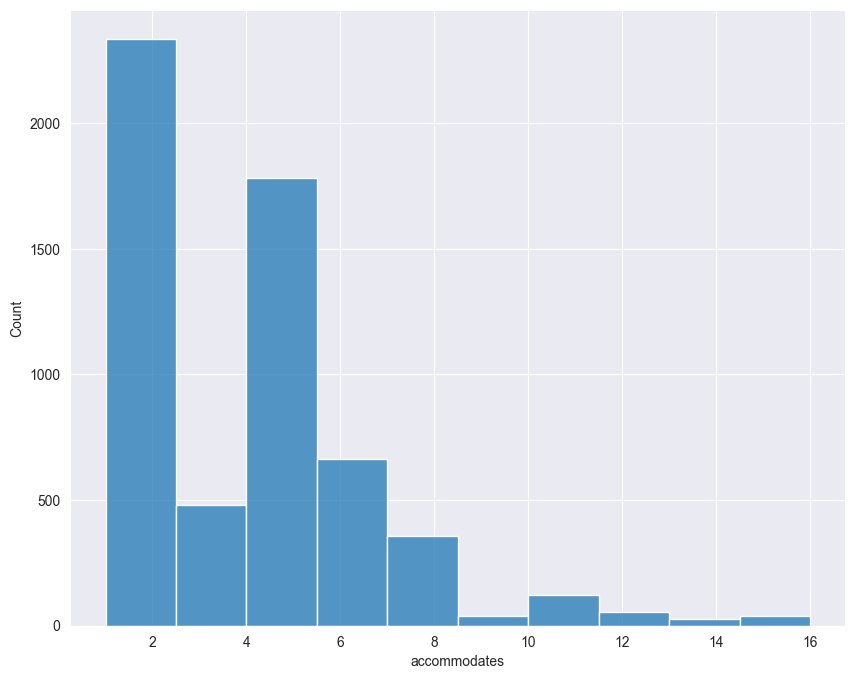

In [ ]:
plt.figure(figsize = (10,8))
sns.histplot(listings_df["accommodates"], bins = 10)

<AxesSubplot: xlabel='bathrooms', ylabel='Count'>

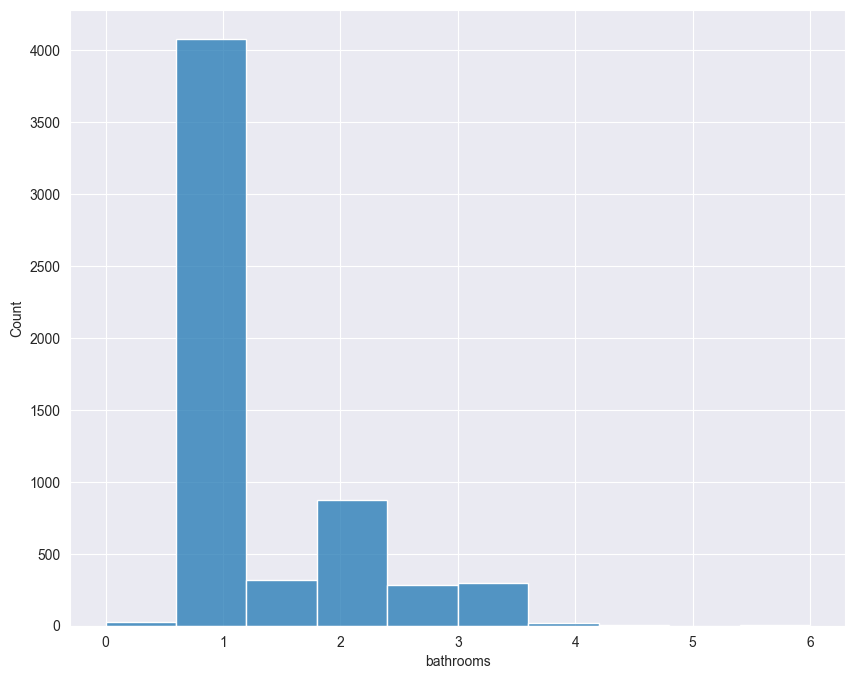

In [ ]:
plt.figure(figsize = (10,8))
sns.histplot(listings_df["bathrooms"], bins = 10)

<AxesSubplot: xlabel='beds', ylabel='Count'>

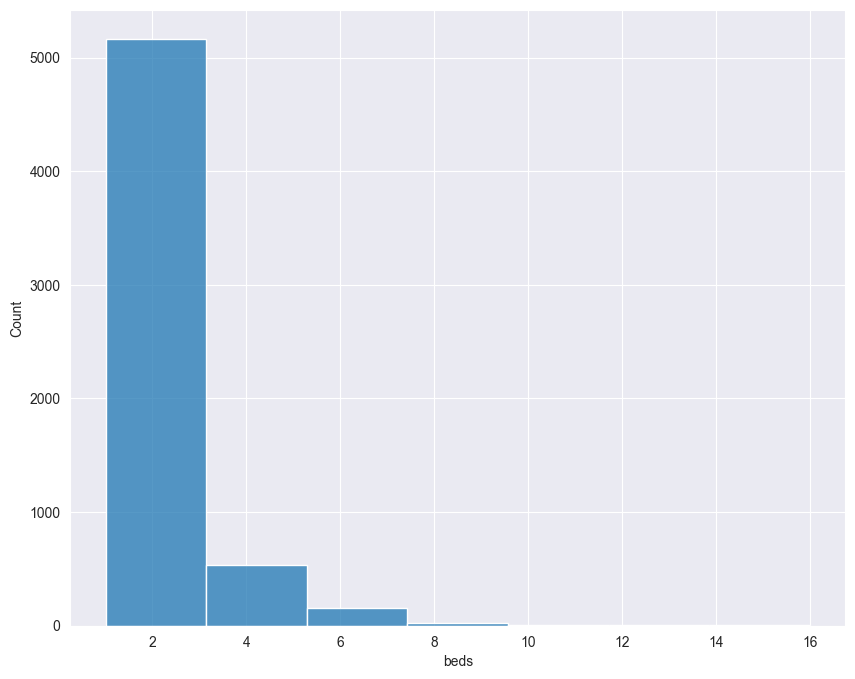

In [ ]:
plt.figure(figsize = (10,8))
sns.histplot(listings_df["beds"], bins = 7)

<AxesSubplot: xlabel='bedrooms', ylabel='Count'>

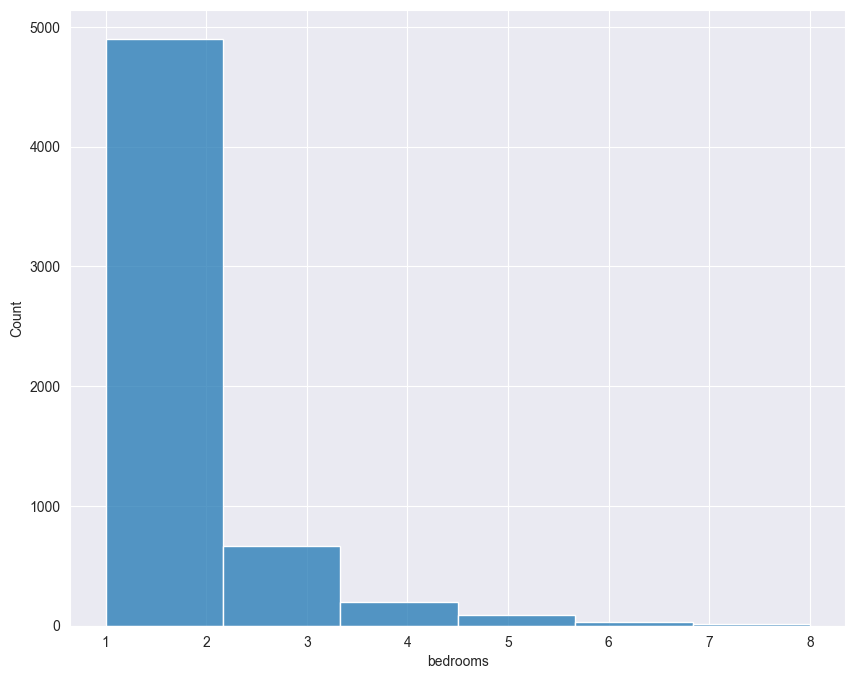

In [ ]:
plt.figure(figsize = (10,8))
sns.histplot(listings_df["bedrooms"], bins = 6)

<AxesSubplot: xlabel='number_of_amenities', ylabel='Count'>

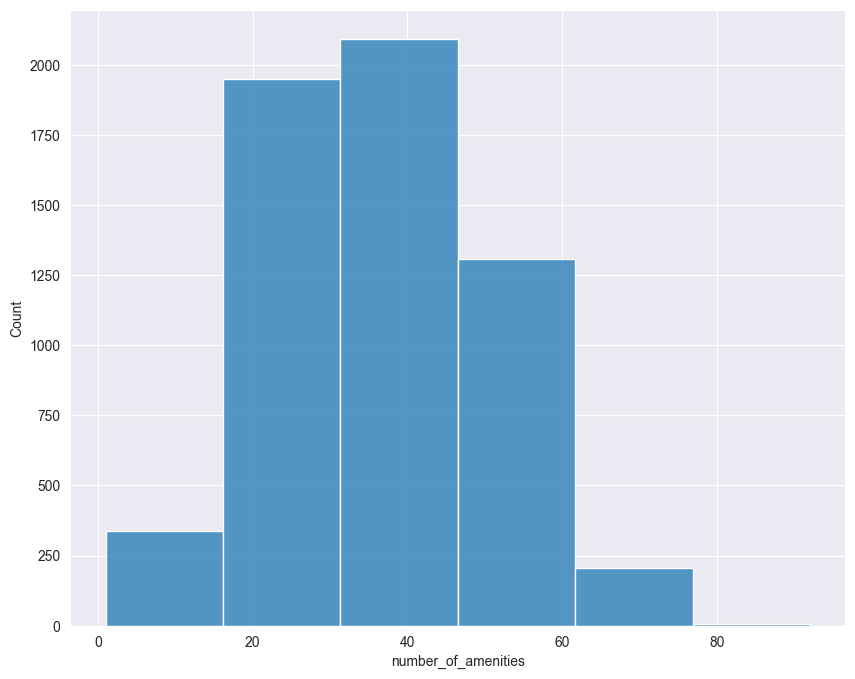

In [ ]:
plt.figure(figsize = (10,8))
sns.histplot(listings_df["number_of_amenities"], bins = 6)

<AxesSubplot: xlabel='number_of_verifications', ylabel='Count'>

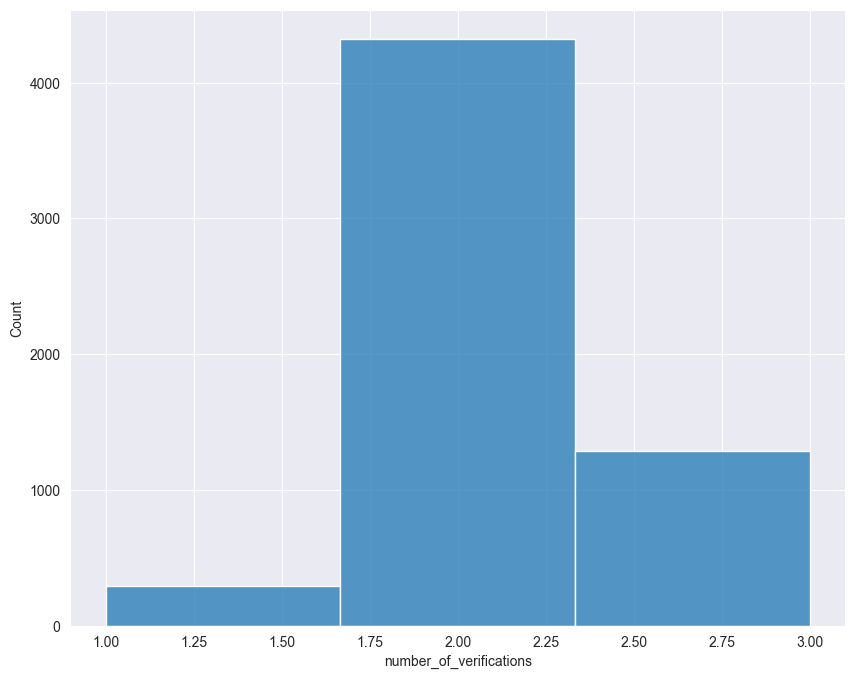

In [ ]:
plt.figure(figsize = (10,8))
sns.histplot(listings_df["number_of_verifications"], bins = 3)

As you can see there is lots of data that we can say outlier. But before doing that we should remember city of Seattle has all kinds of houses. Flats, lofts and big town houses. After reviewing the candidate outliers, we realize that they are not actually outliers and that they are unique listings.

We can move on to calendar data.

In [ ]:
dataC.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,53939356,2022-09-18,f,$38.00,$38.00,1.0,1125.0
1,53939356,2022-09-19,t,$37.00,$37.00,1.0,1125.0
2,53939356,2022-09-20,t,$37.00,$37.00,1.0,1125.0
3,53939356,2022-09-21,t,$39.00,$39.00,1.0,1125.0
4,53939356,2022-09-22,t,$39.00,$39.00,1.0,1125.0


As you can see we have fewer columns. We have dates and prices columns according to that date. And availability information.

In [ ]:
#Checking for empty columns
dataC.isnull().sum()

listing_id           0
date                 0
available            0
price             1863
adjusted_price    1863
minimum_nights    7808
maximum_nights    7808
dtype: int64

In [ ]:
#We can delete minimum_nights and maximum_nights columns because we have same columns in listings_df
same_ones = ["minimum_nights", "maximum_nights"]

dataC = dataC.drop(columns = same_ones, axis=1)

In [ ]:
#Diving general date information for better understanding and visualization.
import datetime as dt

dataC['date'] = pd.to_datetime(dataC['date'], format = '%Y-%m-%d')
dataC['month'] = dataC['date'].dt.month
dataC['year'] = dataC['date'].dt.year
dataC['day'] = dataC['date'].dt.day


Before processing the NaN values ​​in the price column, we must merge it with the listings_df file. In this way, we can perform more precise operations.

In [ ]:
#Merging
listings_df = listings_df.rename(columns={"id": "listing_id"})
full_df = pd.merge(dataC, listings_df, on = 'listing_id')

In [ ]:
full_df.head()

,listing_id,date,available,price_x,adjusted_price,month,year,day,listing_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price_y,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,number_of_amenities,number_of_verifications
0,53939356,2022-09-18,f,$38.00,$38.00,9,2022,18,https://www.airbnb.com/rooms/53939356,7,9,"['email', 'phone']",t,t,Cedar Park,Lake City,47.73908,-122.29009,Private room in home,Private room,1,2,1.0,1.0,42.0,1,365,1.0,1.0,1125.0,1125.0,1.0,1125.0,t,29,59,89,364,f,t,7,0,7,0,28,2
1,53939356,2022-09-19,t,$37.00,$37.00,9,2022,19,https://www.airbnb.com/rooms/53939356,7,9,"['email', 'phone']",t,t,Cedar Park,Lake City,47.73908,-122.29009,Private room in home,Private room,1,2,1.0,1.0,42.0,1,365,1.0,1.0,1125.0,1125.0,1.0,1125.0,t,29,59,89,364,f,t,7,0,7,0,28,2
2,53939356,2022-09-20,t,$37.00,$37.00,9,2022,20,https://www.airbnb.com/rooms/53939356,7,9,"['email', 'phone']",t,t,Cedar Park,Lake City,47.73908,-122.29009,Private room in home,Private room,1,2,1.0,1.0,42.0,1,365,1.0,1.0,1125.0,1125.0,1.0,1125.0,t,29,59,89,364,f,t,7,0,7,0,28,2
3,53939356,2022-09-21,t,$39.00,$39.00,9,2022,21,https://www.airbnb.com/rooms/53939356,7,9,"['email', 'phone']",t,t,Cedar Park,Lake City,47.73908,-122.29009,Private room in home,Private room,1,2,1.0,1.0,42.0,1,365,1.0,1.0,1125.0,1125.0,1.0,1125.0,t,29,59,89,364,f,t,7,0,7,0,28,2
4,53939356,2022-09-22,t,$39.00,$39.00,9,2022,22,https://www.airbnb.com/rooms/53939356,7,9,"['email', 'phone']",t,t,Cedar Park,Lake City,47.73908,-122.29009,Private room in home,Private room,1,2,1.0,1.0,42.0,1,365,1.0,1.0,1125.0,1125.0,1.0,1125.0,t,29,59,89,364,f,t,7,0,7,0,28,2


In [ ]:
full_df.shape

(2146042, 46)

Closer look for price columns, our goal is filling NaN values best way possible.

In [ ]:
full_df['price_x'] = full_df['price_x'].apply(financial_to_float)
full_df['adjusted_price'] = full_df['adjusted_price'].apply(financial_to_float)

In [ ]:
#Filling NaN price_x values with price_y values
full_df.price_x.fillna(full_df.price_y, inplace=True)

In [ ]:
full_df = full_df.drop(columns="adjusted_price", axis=1)

In [ ]:
full_df.isnull().sum()

listing_id                                      0
date                                            0
available                                       0
price_x                                         0
month                                           0
year                                            0
day                                             0
listing_url                                     0
host_listings_count                             0
host_total_listings_count                       0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
neighbourhood_group_cleansed                    0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0


Visualizations

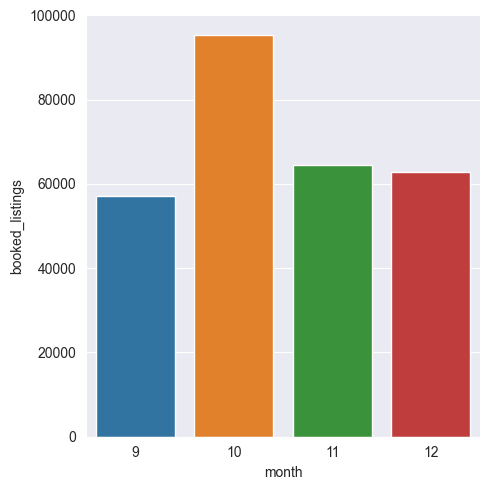

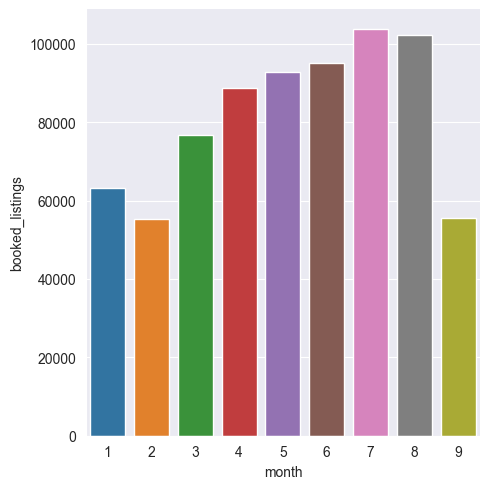

In [ ]:
monthly_booked = full_df[(full_df['available'] == 'f') & (full_df['year'] == 2022)][['listing_id', 'month']].groupby(['month']).count()
monthly_booked_1 = full_df[(full_df['available'] == 'f') & (full_df['year'] == 2023)][['listing_id', 'month']].groupby(['month']).count()
monthly_booked = monthly_booked.reset_index()
monthly_booked.rename(columns={"listing_id": "booked_listings"}, inplace = True)
monthly_booked_1 = monthly_booked_1.reset_index()
monthly_booked_1.rename(columns={"listing_id": "booked_listings"}, inplace = True)
sns.catplot (x = 'month', y = 'booked_listings', data = monthly_booked , kind = 'bar')
sns.catplot (x = 'month', y = 'booked_listings', data = monthly_booked_1 , kind = 'bar')

We can see listing numbers for each month. First graph represents 2022 and second graph represents 2023. We can see June has most listings and Feburary has least.

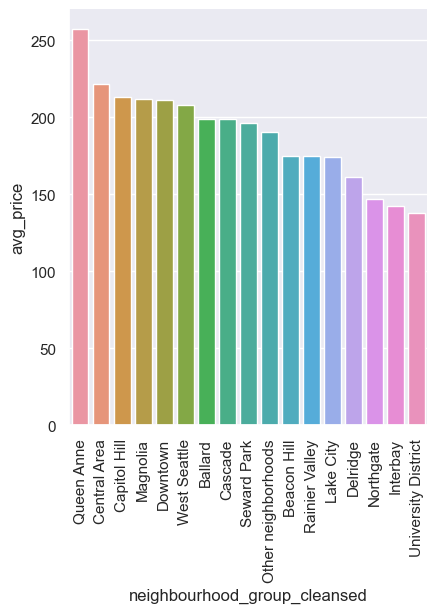

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

avg_neighbourhood_price = full_df[['neighbourhood_group_cleansed','price_x']].groupby('neighbourhood_group_cleansed').mean().reset_index()

top_20_neighbourhoods = avg_neighbourhood_price.nlargest(20, 'price_x', keep='first')
top_20_neighbourhoods.rename(columns={"price_x": "avg_price"}, inplace = True)

sns.catplot (x = 'neighbourhood_group_cleansed', y = 'avg_price', data = top_20_neighbourhoods , kind = 'bar')
plt.xticks(rotation=90);

Here we can see most expensive and least expensive neighbourhood according to our data.

In [ ]:
#Dropping other useless columns
columns = ["date", "price_y", "listing_url", "listing_id", "latitude", "longitude"]
full_df = full_df.drop(columns = columns, axis = 1)

C:\Users\Orhun\AppData\Local\Temp\ipykernel_3092\4213144482.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(full_df.corr())


<AxesSubplot: >

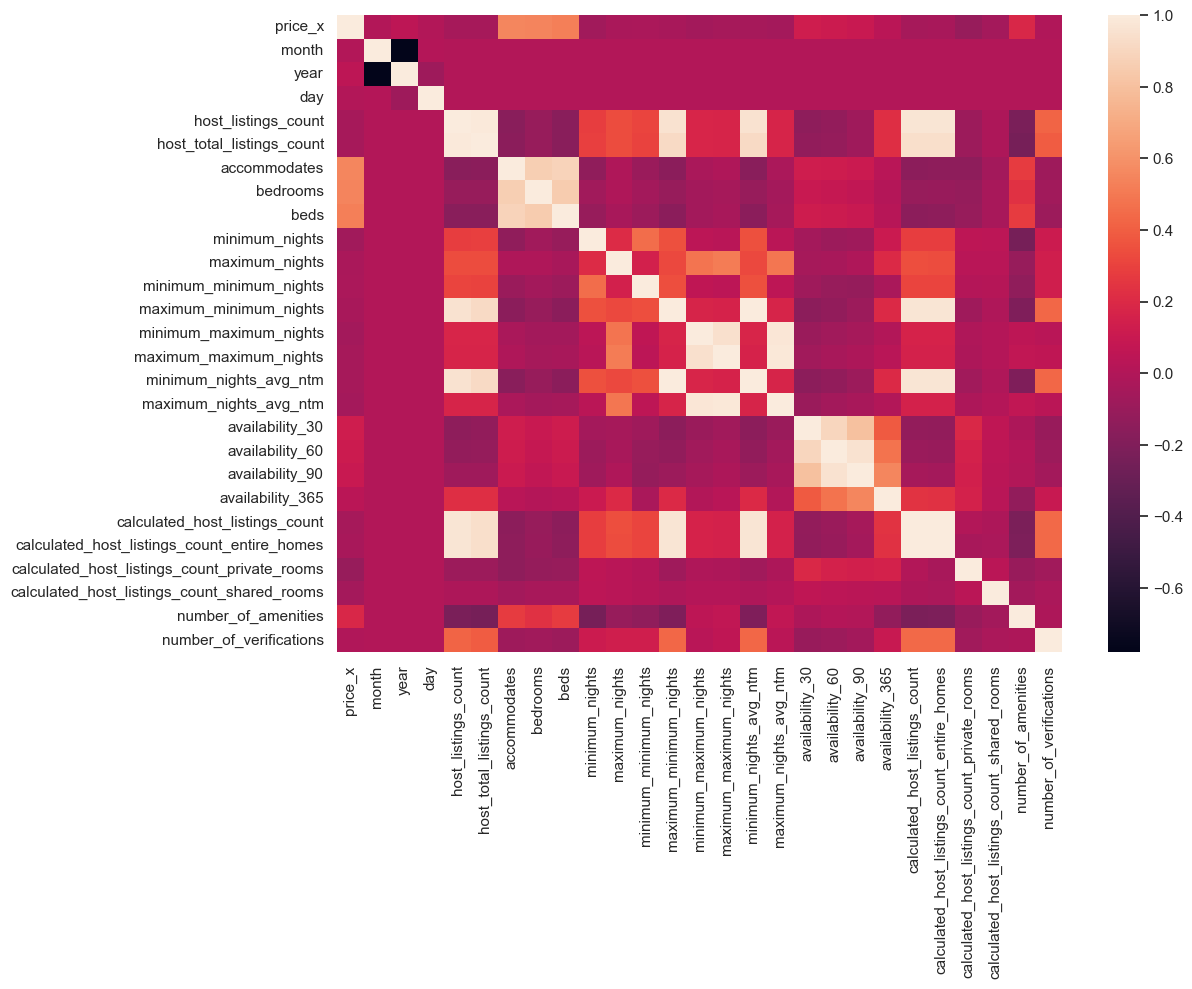

In [ ]:
sns.heatmap(full_df.corr())

In [ ]:
full_df.describe()

,price_x,month,year,day,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,number_of_amenities,number_of_verifications
count,2.146042e+06,2.146042e+06,2.146042e+06,2.146042e+06,2.146042e+06,2.146042e+06,2.146042e+06,2.146042e+06,2.146042e+06,2.146042e+06,2.146042e+06,2.146042e+06,2.146042e+06,2.146042e+06,2.146042e+06,2.146042e+06,2.146042e+06,2.146042e+06,2.146042e+06,2.146042e+06,2.146042e+06,2.146042e+06,2.146042e+06,2.146042e+06,2.146042e+06,2.146042e+06,2.146042e+06
mean,1.975337e+02,6.526217e+00,2.022712e+03,1.572076e+01,3.205121e+02,3.731286e+02,3.952375e+00,1.664523e+00,2.101684e+00,1.293897e+01,5.221282e+02,1.488755e+01,5.719184e+01,8.031657e+02,8.306011e+02,5.510014e+01,8.180170e+02,1.020017e+01,2.741014e+01,4.713932e+01,1.877286e+02,3.301168e+01,3.185595e+01,1.146028e+00,9.694591e-03,3.689667e+01,2.169229e+00
std,1.712482e+02,3.447743e+00,4.526632e-01,8.796628e+00,1.009742e+03,1.128533e+03,2.468630e+00,1.007099e+00,1.450143e+00,1.855780e+01,4.997533e+02,4.490544e+01,1.743168e+02,4.754744e+02,4.550873e+02,1.687435e+02,4.640398e+02,9.714595e+00,2.018044e+01,3.030498e+01,1.287560e+02,8.947193e+01,8.955368e+01,3.784300e+00,1.523386e-01,1.356172e+01,4.887713e-01
min,1.000000e+01,1.000000e+00,2.022000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,2.000000e-01,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,1.090000e+02,4.000000e+00,2.022000e+03,8.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+01,1.000000e+00,2.000000e+00,3.650000e+02,3.650000e+02,2.000000e+00,3.650000e+02,0.000000e+00,7.000000e+00,1.900000e+01,6.700000e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.700000e+01,2.000000e+00
50%,1.550000e+02,7.000000e+00,2.023000e+03,1.600000e+01,3.000000e+00,4.000000e+00,4.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,3.650000e+02,2.000000e+00,3.000000e+00,1.125000e+03,1.125000e+03,3.000000e+00,1.125000e+03,8.000000e+00,2.900000e+01,5.300000e+01,1.700000e+02,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.500000e+01,2.000000e+00
75%,2.370000e+02,1.000000e+01,2.023000e+03,2.300000e+01,1.500000e+01,2.000000e+01,5.000000e+00,2.000000e+00,3.000000e+00,3.000000e+01,1.125000e+03,3.000000e+01,3.000000e+01,1.125000e+03,1.125000e+03,3.000000e+01,1.125000e+03,1.700000e+01,4.500000e+01,7.300000e+01,3.220000e+02,1.000000e+01,7.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,2.000000e+00
max,9.999000e+03,1.200000e+01,2.023000e+03,3.100000e+01,4.075000e+03,4.399000e+03,1.600000e+01,8.000000e+00,1.600000e+01,3.650000e+02,1.000000e+04,7.300000e+02,7.300000e+02,1.000000e+04,1.000000e+04,7.300000e+02,1.000000e+04,3.000000e+01,6.000000e+01,9.000000e+01,3.650000e+02,3.690000e+02,3.690000e+02,3.000000e+01,4.000000e+00,9.200000e+01,3.000000e+00


4. Model Development

Supervised learning will be used for model develepment. We will find categorical variables for one hot encoding:



In [ ]:
cat_col = ["available", "host_verifications", "host_has_profile_pic", "host_identity_verified", "neighbourhood_cleansed", "neighbourhood_group_cleansed", "property_type", "room_type", "license", "instant_bookable", "has_availability"]

In [ ]:
full_df = pd.get_dummies(full_df, columns= cat_col)

In [ ]:
full_df.shape

(2146042, 202)

In [ ]:
full_df.isnull().sum()

price_x                0
month                  0
year                   0
day                    0
host_listings_count    0
                      ..
license_t              0
instant_bookable_f     0
instant_bookable_t     0
has_availability_f     0
has_availability_t     0
Length: 202, dtype: int64

After preparing data it is time to develop different models. After finding the most successful model we will get closer look.

In [ ]:
full_df.head()

,price_x,month,year,day,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,number_of_amenities,number_of_verifications,available_f,available_t,"host_verifications_['email', 'phone', 'work_email']","host_verifications_['email', 'phone']",host_verifications_['email'],"host_verifications_['phone', 'work_email']",host_verifications_['phone'],host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,neighbourhood_cleansed_Adams,neighbourhood_cleansed_Alki,neighbourhood_cleansed_Arbor Heights,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Bitter Lake,neighbourhood_cleansed_Briarcliff,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Broadview,neighbourhood_cleansed_Broadway,neighbourhood_cleansed_Bryant,neighbourhood_cleansed_Cedar Park,neighbourhood_cleansed_Central Business District,neighbourhood_cleansed_Columbia City,neighbourhood_cleansed_Crown Hill,neighbourhood_cleansed_Dunlap,neighbourhood_cleansed_East Queen Anne,neighbourhood_cleansed_Eastlake,neighbourhood_cleansed_Fairmount Park,neighbourhood_cleansed_Fauntleroy,neighbourhood_cleansed_First Hill,neighbourhood_cleansed_Fremont,neighbourhood_cleansed_Gatewood,neighbourhood_cleansed_Genesee,neighbourhood_cleansed_Georgetown,neighbourhood_cleansed_Green Lake,neighbourhood_cleansed_Greenwood,neighbourhood_cleansed_Haller Lake,neighbourhood_cleansed_Harbor Island,neighbourhood_cleansed_Harrison/Denny-Blaine,neighbourhood_cleansed_High Point,neighbourhood_cleansed_Highland Park,neighbourhood_cleansed_Holly Park,neighbourhood_cleansed_Industrial District,neighbourhood_cleansed_Interbay,neighbourhood_cleansed_International District,neighbourhood_cleansed_Laurelhurst,neighbourhood_cleansed_Lawton Park,neighbourhood_cleansed_Leschi,neighbourhood_cleansed_Lower Queen Anne,neighbourhood_cleansed_Loyal Heights,neighbourhood_cleansed_Madison Park,neighbourhood_cleansed_Madrona,neighbourhood_cleansed_Mann,neighbourhood_cleansed_Maple Leaf,neighbourhood_cleansed_Matthews Beach,neighbourhood_cleansed_Meadowbrook,neighbourhood_cleansed_Mid-Beacon Hill,neighbourhood_cleansed_Minor,neighbourhood_cleansed_Montlake,neighbourhood_cleansed_Mount Baker,neighbourhood_cleansed_North Admiral,neighbourhood_cleansed_North Beach/Blue Ridge,neighbourhood_cleansed_North Beacon Hill,neighbourhood_cleansed_North College Park,neighbourhood_cleansed_North Delridge,neighbourhood_cleansed_North Queen Anne,neighbourhood_cleansed_Olympic Hills,neighbourhood_cleansed_Phinney Ridge,neighbourhood_cleansed_Pike-Market,neighbourhood_cleansed_Pinehurst,neighbourhood_cleansed_Pioneer Square,neighbourhood_cleansed_Portage Bay,neighbourhood_cleansed_Rainier Beach,neighbourhood_cleansed_Rainier View,neighbourhood_cleansed_Ravenna,neighbourhood_cleansed_Riverview,neighbourhood_cleansed_Roosevelt,neighbourhood_cleansed_Roxhill,neighbourhood_cleansed_Sand Point,neighbourhood_cleansed_Seaview,neighbourhood_cleansed_Seward Park,neighbourhood_cleansed_South Beacon Hill,neighbourhood_cleansed_South Delridge,neighbourhood_cleansed_South Lake Union,neighbourhood_cleansed_South Park,neighbourhood_cleansed_Southeast Magnolia,neighbourhood_cleansed_Stevens,neighbourhood_cleansed_Sunset Hill,neighbourhood_cleansed_University District,neighbourhood_cleansed_Victory Heights,neighbourhood_cleansed_View Ridge,neighbourhood_cleansed_Wallingford,neighbourhood_cleansed_Wedgwood,neighbourhood_cleansed_West Queen Anne,neighbourhood_cleansed_West Woodland,neighbourhood_cleansed_Westlake,neighbourhood_cleansed_Whittier Heights,neighbourhood_cl

Since my dataset is too big to compute (with the specs that i have) i will take the random 100000 rows from my main dataset and apply machine learning algorithms. After finding best model i will continue with full_df.

In [ ]:
lf = full_df.sample(100000)

In [ ]:
lf.shape

(100000, 202)

4.1. **Linear Regression**

The link between a dependent variable and an independent (predictor) variable is modeled using a machine learning technique called linear regression. The model can employ linear predictor functions to model the relationship and estimate unknown parameters from the data. In order to determine whether the independent variables are useful in price prediction, linear regression is used. For instance, a larger house costs more money. Some connections, like the one between longitude and cost, are not linear, though. Not only in two-dimensional space, but also in multidimensional space, are linear relationships possible. The price can be predicted using a linear regression model based on previous data if there is a linear relationship between two or more factors.

Values in X and Y reflect the input (dependent) variable and the output (independent) variable, respectively, that the model is attempting to predict, given two datasets. In our situation, we can assume that X represents the accommodates or the number of beds, and Y represents the cost of the matching property. The best model to predict the value of Y is linear regression if each value in X is increasing as each value in Y. If this is the case, then X and Y may have a linear connection.


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
X = lf.drop(['price_x'], axis=1)
y = lf['price_x'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

lm_model = LinearRegression(normalize=True)  # Instantiate
lm_model.fit(X_train, y_train)  #Fit

y_test_preds = lm_model.predict(X_test)

"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

lin_acc = r2_score(y_test, y_test_preds)
print(lin_acc)

0.4057900692508579


4.2. **Logistic Regression**

A statistical analysis method called logistic regression uses previous observations from a data set to predict a binary outcome, such as yes or no. By examining the correlation between one or more already present independent variables, a logistic regression model forecasts a dependent data variable. A logistic regression could be used, for instance, to forecast whether a candidate for office will win or lose, or if a high school student will be accepted into a particular institution or not. These simple choices between two options allow for binary outcomes. Multiple criteria for input can be taken into account using a logistic regression model.

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_pred), len(y_test))

lr_acc = r2_score(y_test, y_pred)
print(lr_acc)

-0.07620478738891423


4.3. **Ridge Regression**

The multicollinearity issue in linear regression is addressed by ridge regression, commonly known as Tikhonov Regularization. When a predictor variable is predicted from other predictors, the multicollinearity problem arises. The weight of a single predictor may not be accurate, even while it does not affect the group's overall prediction accuracy. When the model contains a significant number of features, the multicollinearity problem frequently arises. Weight values will be quite high when calculating parameter weights using the least squares approach in the multicollinearity case.

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
from sklearn.model_selection import GridSearchCV
params_Ridge = {'alpha': [1,0.1,0.01,0.01] , "fit_intercept": [True, False], "solver": ['svd', 'cholesky']}
Ridge_GS = GridSearchCV(ridge_reg, param_grid=params_Ridge, n_jobs=-1)
result = Ridge_GS.fit(X_train,y_train)
Ridge_GS.best_params_
print('Best Score: %s' % result.best_score_)

r_acc = result.best_score_
print(r_acc)

Best Score: 0.40516288926238586
0.40516288926238586


4.4. **Lasso Regression**

Shrinkage is used in the linear regression method known as lasso regression. When data values shrink toward a middle value, such as the mean, this is called shrinkage. Simple, sparse models are encouraged by the lasso approach (i.e. models with fewer parameters). When models exhibit significant levels of multicollinearity or when you wish to automate specific steps in the model selection process, such as variable selection and parameter elimination, this particular sort of regression is ideally suited.

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso()
lasso_p = {"copy_X": [True, False],
           "alpha": np.arange(1,5),
           "max_iter": np.arange(2,5)}
l_gr = GridSearchCV(model,lasso_p, cv=3)
l_gr.fit(X_train, y_train)
print("Score",l_gr.best_score_)

l_acc = l_gr.best_score_
print(l_acc)

Score 0.3687609548345843
0.3687609548345843


4.5. **Decision Tree Classification**

A decision tree creates tree-like models for classification or regression. It incrementally develops an associated decision tree while segmenting a dataset into smaller and smaller sections. The outcome is a tree containing leaf nodes and decision nodes. Two or more branches, one for each value of the characteristic under test, make up a decision node. A choice regarding the numerical aim is represented by a leaf node. The root node is the topmost decision node in a tree and corresponds to the best predictor. Both category and numerical data can be processed using decision trees.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

param_dict = {
    "criterion": ["gini", "entropy"],
    "max_depth":range(5,10),
    "min_samples_split":range(5,10),
    "min_samples_leaf":range(5,10)
}

grid = GridSearchCV(model,
                    param_grid=param_dict,
                    cv=5,
                    verbose=1,
                    n_jobs=-1)

grid.fit(X_train,y_train)
grid.best_params_
grid.best_estimator_
print(grid.best_score_)

dtc_acc = grid.best_score_

Fitting 5 folds for each of 250 candidates, totalling 1250 fits
0.1476142857142857


4.6. **Random Forest Classifier**

The bagging method is extended by the random forest algorithm, which uses feature randomness in addition to bagging to produce an uncorrelated forest of decision trees. The random subspace method, also known as feature bagging, creates a random subset of features that guarantees low correlation between decision trees. The main distinction between decision trees and random forests is this. Random forests merely choose a portion of those feature splits, whereas decision trees take into account all possible feature splits.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


param_grid = [
    {'n_estimators':[3,10],'max_features':[2,4,6]},
    {'bootstrap':[False],'n_estimators':[3,10], 'max_features':[2,3]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                           scoring = 'neg_mean_squared_error',
                           return_train_score = True)
grid_search.fit(X_train, y_train)

grid_search.best_estimator_

cvres = grid_search.cv_results_

y_test_preds = grid_search.predict(X_test)
y_train_preds = grid_search.predict(X_train)

print("The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test)))

rfc_acc = r2_score(y_test, y_test_preds)

The r-squared score for your model was 0.9209195977370062 on 30000 values.


4.7. **K-Nearest Neighbors Algorithm**

The k-nearest neighbors algorithm, sometimes referred to as KNN or k-NN, is a supervised learning classifier that employs proximity to produce classifications or predictions about the grouping of a single data point. Although it can be applied to classification or regression issues, it is commonly employed as a classification algorithm because it relies on the idea that comparable points can be discovered close to one another.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

knn_acc = grid_search.best_score_ *100

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Accuracy for our training dataset with tuning is : 54.29%


In [ ]:
data = [['LinearRegression', lin_acc], ['LogisticRegression', lr_acc], ['Ridge', r_acc], ['Lasso', l_acc], ['DecisionTreeClassifier', dtc_acc], ['RandomForestRegressor', rfc_acc], ['KNeighborsClassifier', knn_acc/100]]
df = pd.DataFrame(data, columns=['Name', 'Accuracy'])

In [ ]:
df

,Name,Accuracy
0,LinearRegression,0.405790
1,LogisticRegression,-0.076205
2,Ridge,0.405163
3,Lasso,0.368761
4,DecisionTreeClassifier,0.147614
5,RandomForestRegressor,0.920920
6,KNeighborsClassifier,0.542871


As we can see even with part of our data RandomForestRegressor is best for our model by far.

5.   **Model Validation**

Now we can proceed with RandomForestRegressor and full_data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
X = full_df.drop(['price_x'], axis=1)
y = full_df['price_x'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

param_grid = [
    {'n_estimators':[2,3,4,5],'max_features':[2,3,4,5]},
    {'bootstrap':[False],'n_estimators':[3,10], 'max_features':[2,3]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 10,
                           scoring = 'neg_mean_squared_error',
                           return_train_score = True)
grid_search.fit(X_train, y_train)

grid_search.best_estimator_

cvres = grid_search.cv_results_

y_test_preds = grid_search.predict(X_test)
y_train_preds = grid_search.predict(X_train)

print("The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test)))

The r-squared score for your model was 0.9652359723811135 on 643813 values.


After we adjust our gridsearch parameters better our score increases as well. Real purpose of using GridSearch and Cross Validation is avoid overfit.

In [ ]:
#Testing for overfitting
"The r-squared (train) score for your model was {} on {} values.".format(r2_score(y_train, y_train_preds), len(y_test))

'The r-squared (train) score for your model was 0.9999212867014823 on 643813 values.'


 The best parameters across ALL searched params:
 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}


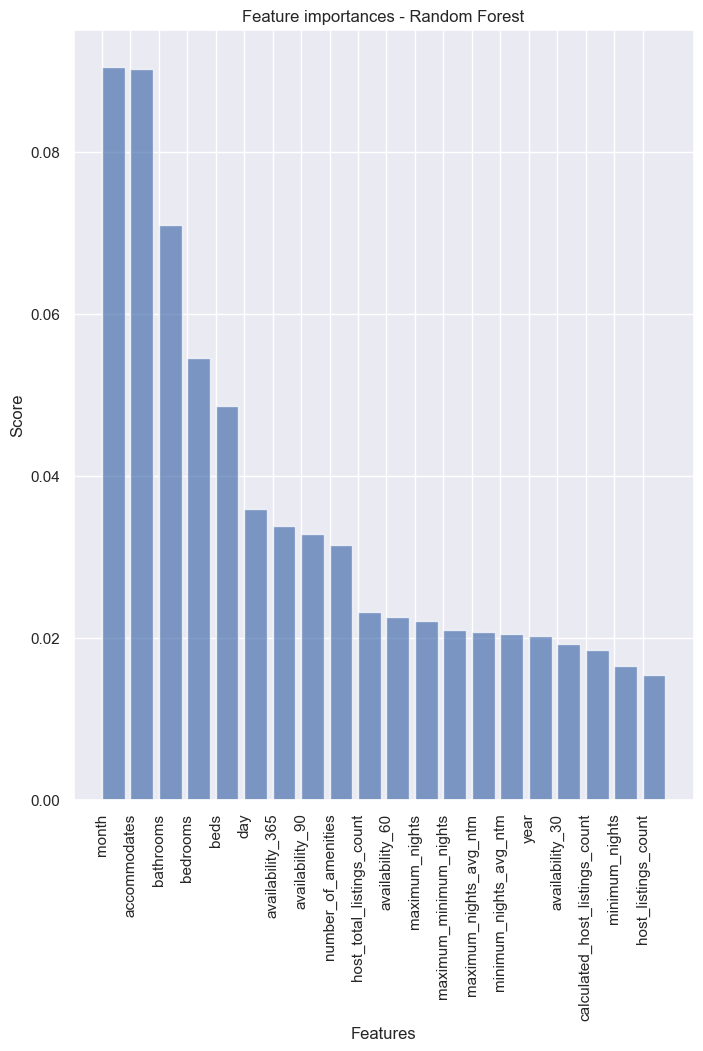

In [ ]:
print("\n The best parameters across ALL searched params:\n", grid_search.best_params_)
feature_importances = grid_search.best_estimator_.feature_importances_
attributes = X_train.columns
values = sorted(zip(attributes, feature_importances), reverse=True)
rdm_forest_feature_importance = pd.DataFrame(values, columns=["feature", "score"]).sort_values(by=['score'],
                                                                                               ascending=False)
features = rdm_forest_feature_importance['feature'][:20]
scores = rdm_forest_feature_importance['score'][:20]
y_pos = np.arange(len(features))
plt.figure(figsize=(8, 10))
plt.bar(y_pos, scores, align='edge', alpha=0.7)
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances - Random Forest')
plt.show()

6.   **Results and Discussion**


As a result of the findings obtained and the graphic above, the factors affecting the price the most were determined. Random Forest Algorithm was used and achieved a success rate of 0.964. Among the features that affect the price the most are factors such as the month, the number of toilets, the number of beds, and the number of people. The number of amenities information added with the feature engineering method is effective on the correlation.

7.   **Conclusion and Future Works**

The purpose of this project is to estimate the preliminary features of the house and the rental price of the person who will create a new AirBnB listing in Seattle, USA. This application can improve by collecting different data such as cleaning fee and using location variables such as latitude and longitude. After the process, it is planned to re-establish this project with the addition of a recomendation bot under the idea that whatever the person who already has an AirBnB listing does can increase the rental price. At the same time, the development of the mobile or web application of the existing project continues.


8.   References

[1]H. Yu and J. Wu, “Real estate price prediction with regression and classiﬁcation,” CS229(Machine Learning) Final Project Reports, 2016.

[2]Y. Ma, Z. Zhang, A. Ihler, and B. Pan, “Estimating warehouse rental price using machinelearning techniques.,” International Journal of Computers, Communications & Control, vol. 13,no. 2, 2018.

[3] Luo, Y. et al. “Predicting Airbnb Listing Price Across Different Cities.” (2019)

[4] Nguyen, QuangTrung. “QuangTrungNguyen/Airbnb-Pricing-Prediction.” GitHub,
github.com/QuangTrungNguyen/Airbnb-pricing-prediction.

[5] http://insideairbnb.com/